# Imports and Constants

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

MARGIN = 5

# Helper Functions

In [2]:
def drawCoordinates(image, axis_length=370, color_x=(0, 0, 255), color_y=(0, 255, 0), thickness=2):
    image = image.copy()
    height, width, _ = image.shape
    origin = (width // 2, height // 2)
    
    # Рисуване на X оста (червена, стрелка само в положителна посока)
    cv2.arrowedLine(image, (origin[0] - axis_length + 150, origin[1]), (origin[0] + axis_length, origin[1]), color_x, thickness, tipLength=0.02)
    
    # Рисуване на Y оста (зелена, стрелка само в положителна посока)
    cv2.arrowedLine(image, (origin[0], origin[1] + axis_length), (origin[0], origin[1] - axis_length), color_y, thickness, tipLength=0.02)
    
    # Добавяне на числа и чертички през 20 пиксела по X оста
    for x in range(origin[0] - 250, origin[0] + 350 + 1, 100):
        if x != origin[0] and x > 150:
            text_size = cv2.getTextSize(str(x - origin[0]), cv2.FONT_HERSHEY_SIMPLEX, 0.75, 1)[0]
            cv2.putText(image, str(x - origin[0]), (x - text_size[0] // 2, origin[1] + 30), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 1)
            cv2.line(image, (x, origin[1] - 5), (x, origin[1] + 5), (0,0,0), 1)
    
    # Добавяне на числа и чертички през 20 пиксела по Y оста
    for y in range(origin[0] - 350, origin[0] + 350 + 1, 100):
        if y != origin[1]:
            text_size = cv2.getTextSize(str(origin[1] - y), cv2.FONT_HERSHEY_SIMPLEX, 0.75, 1)[0]
            cv2.putText(image, str(origin[1] - y), (origin[0] - text_size[0] - 5, y + text_size[1] // 2), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 1)
            cv2.line(image, (origin[0] - 5, y), (origin[0] + 5, y), (0,0,0), 1)
    
    # Добавяне на имена на осите
    cv2.putText(image, "x", (origin[0] + axis_length + 10, origin[1] + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, color_x, 2)
    cv2.putText(image, "y", (origin[0] + 5, origin[1] - axis_length - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color_y, 2)

    return image[:,150:]

In [3]:
def drawLabels(image, lables):
    image = image.copy()

    font = cv2.FONT_HERSHEY_TRIPLEX
    font_scale = 1.5
    color = (0, 0, 0)
    thickness = 1
    alpha = 0.5

    for k in range(len(labels)):
        text, w, h = labels[k]
        text_size, _ = cv2.getTextSize(text, font, font_scale, thickness)
        rectangle = np.ones((text_size[1] + 10, text_size[0] + 10, 3), np.uint8) * 255  
        image[h - text_size[1] - 9 : h + 1, w : w + text_size[0] + 10] = \
                            cv2.addWeighted(image[h - text_size[1] - 9 : h + 1, w : w + text_size[0] + 10], alpha, rectangle, 1 - alpha, 0)
        image = cv2.putText(image, text, (w + 5, h - text_size[1] // 2 + 5), font, font_scale, color, thickness, cv2.LINE_AA)

    return image

In [4]:
def drawObstacle(image, obstacle):
    image = image.copy()

    cv2.circle(image, (400 + int(obstacle[0]), 400 - int(obstacle[1])), int(obstacle[2]) - 2, (192, 0, 0), -1)

    return image

# Figure 2.

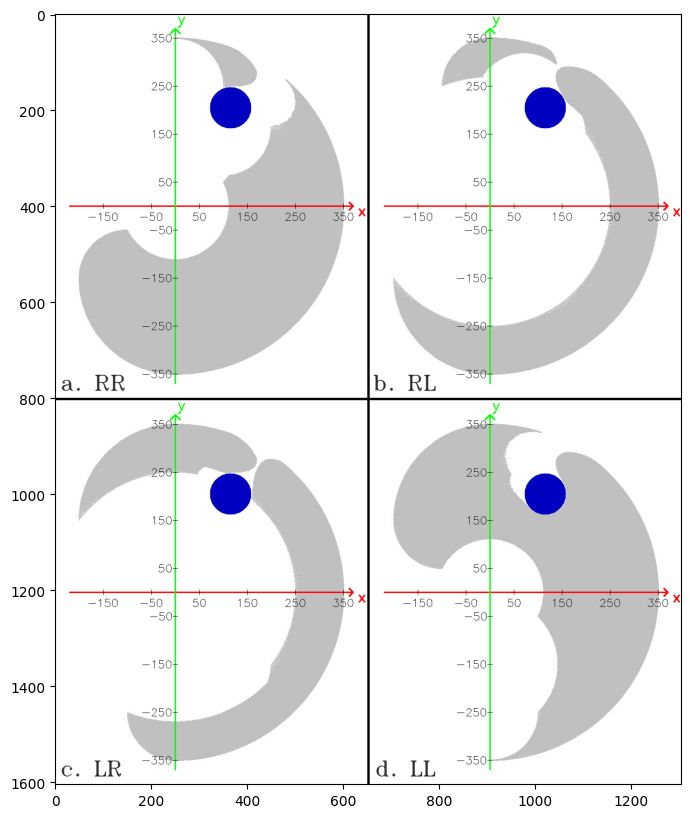

In [5]:
obstacle = (115, 205, 45)
image = cv2.imread("exp1_workspace_obstacle_zone00.jpg")
image = drawObstacle(image, obstacle)
image = drawCoordinates(image)
h, w, _ = image.shape
fig = np.zeros((h * 2 + MARGIN, w * 2 + MARGIN, 3), np.uint8)
fig[:h,:w] = image
image = cv2.imread("exp1_workspace_obstacle_zone01.jpg")
image = drawObstacle(image, obstacle)
image = drawCoordinates(image)
fig[:h,w+MARGIN:] = image
image = cv2.imread("exp1_workspace_obstacle_zone10.jpg")
image = drawObstacle(image, obstacle)
image = drawCoordinates(image)
fig[h+MARGIN:,:w] = image
image = cv2.imread("exp1_workspace_obstacle_zone11.jpg")
image = drawObstacle(image, obstacle)
image = drawCoordinates(image)
fig[h+MARGIN:,w+MARGIN:] = image

labels = [("a. RR", 5, h - 5),
          ("b. RL", w + 5, h - 5),
          ("c. LR", 5, 2 * h + MARGIN - 1 - 5),
          ("d. LL", w + MARGIN + 5, 2 * h + MARGIN - 1 - 5)]
fig = drawLabels(fig, labels)

cv2.imwrite("fig2.jpg", fig)

plt.figure(figsize=(40,10))
plt.imshow(cv2.cvtColor(fig, cv2.COLOR_BGR2RGB))

# Figure 6.

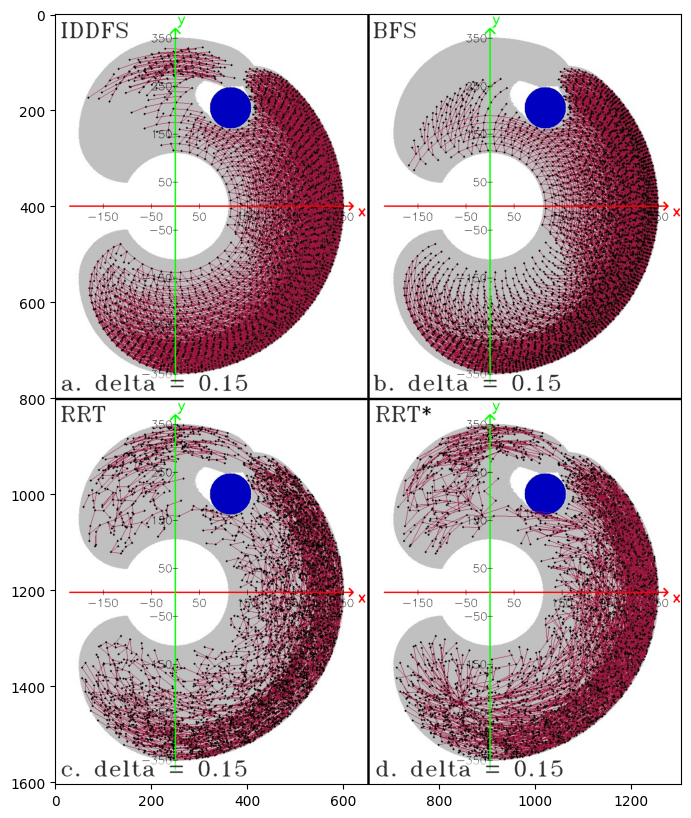

In [6]:
image = cv2.imread("exp3_iddfs_0.15_tree.jpg")
image = drawCoordinates(image)
h, w, _ = image.shape
fig = np.zeros((h * 2 + MARGIN, w * 2 + MARGIN, 3), np.uint8)
fig[:h,:w] = image
image = cv2.imread("exp3_bfs_0.15_tree.jpg")
image = drawCoordinates(image)
fig[:h,w+MARGIN:] = image
image = cv2.imread("exp3_rrt_0.15_tree.jpg")
image = drawCoordinates(image)
fig[h+MARGIN:,:w] = image
image = cv2.imread("exp3_rrt_star_0.15_tree.jpg")
image = drawCoordinates(image)
fig[h+MARGIN:,w+MARGIN:] = image

labels = [("a. delta = 0.15", 5, h - 5),
          ("IDDFS", 5, 60),
          ("b. delta = 0.15", w + 5, h - 5),
          ("BFS", w + 5, 60),
          ("c. delta = 0.15", 5, 2 * h + MARGIN - 1 - 5),
          ("RRT", 5, h + MARGIN - 5 + 60),
          ("d. delta = 0.15", w + MARGIN + 5, 2 * h + MARGIN - 1 - 5),
          ("RRT*", w + MARGIN + 5, h + MARGIN - 5 + 60)]
fig = drawLabels(fig, labels)

cv2.imwrite("fig6.jpg", fig)

plt.figure(figsize=(40,10))
plt.imshow(cv2.cvtColor(fig, cv2.COLOR_BGR2RGB))

# Figure 7

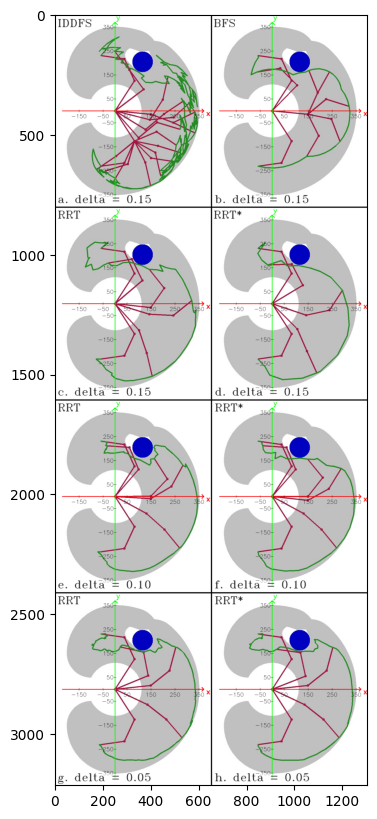

In [7]:
image = cv2.imread("exp3_iddfs_0.15.jpg")
image = drawCoordinates(image)
h, w, _ = image.shape
fig = np.zeros((h * 4 + MARGIN * 3, w * 2 + MARGIN, 3), np.uint8)
fig[:h,:w] = image
image = cv2.imread("exp3_bfs_0.15.jpg")
image = drawCoordinates(image)
fig[:h,w+MARGIN:] = image
image = cv2.imread("exp3_rrt_0.15.jpg")
image = drawCoordinates(image)
fig[h+MARGIN:2*h+MARGIN,:w] = image
image = cv2.imread("exp3_rrt_star_0.15.jpg")
image = drawCoordinates(image)
fig[h+MARGIN:2*h+MARGIN,w+MARGIN:] = image
image = cv2.imread("exp1_rrt_0.1.jpg")
image = drawCoordinates(image)
fig[2*h+2*MARGIN:3*h+2*MARGIN,:w] = image
image = cv2.imread("exp1_rrt_star_0.1.jpg")
image = drawCoordinates(image)
fig[2*h+2*MARGIN:3*h+2*MARGIN,w+MARGIN:] = image
image = cv2.imread("exp2_rrt_0.05.jpg")
image = drawCoordinates(image)
fig[3*h+3*MARGIN:4*h+3*MARGIN,:w] = image
image = cv2.imread("exp2_rrt_star_0.05.jpg")
image = drawCoordinates(image)
fig[3*h+3*MARGIN:4*h+3*MARGIN,w+MARGIN:] = image

labels = [("a. delta = 0.15", 5,              h - 5),                      ("IDDFS", 5,              60),
          ("b. delta = 0.15", w + MARGIN + 5, h - 5),                      ("BFS",   w + 5,          60),
          ("c. delta = 0.15", 5,              2 * h + MARGIN - 1 - 5),     ("RRT",   5,              h + MARGIN - 5 + 60),
          ("d. delta = 0.15", w + MARGIN + 5, 2 * h + MARGIN - 1 - 5),     ("RRT*",  w + 5,          h + MARGIN - 5 + 60),
          ("e. delta = 0.10", 5,              3 * h + 2 * MARGIN - 1 - 5), ("RRT",   5,              2 * h + 2 * MARGIN - 5 + 60),
          ("f. delta = 0.10", w + MARGIN + 5, 3 * h + 2 * MARGIN - 1 - 5), ("RRT*",  w + MARGIN + 5, 2 * h + 2 * MARGIN - 5 + 60),
          ("g. delta = 0.05", 5,              4 * h + 3 * MARGIN - 1 - 5), ("RRT",   5,              3 * h + 3 * MARGIN - 5 + 60),
          ("h. delta = 0.05", w + MARGIN + 5, 4 * h + 3 * MARGIN - 1 - 5), ("RRT*",  w + MARGIN + 5, 3 * h + 3 * MARGIN - 5 + 60)]
fig = drawLabels(fig, labels)

cv2.imwrite("fig7.jpg", fig)

plt.figure(figsize=(40,10))
plt.imshow(cv2.cvtColor(fig, cv2.COLOR_BGR2RGB))